<a href="https://colab.research.google.com/github/IALeMans/RL-meetup-Reinforcement_Learning/blob/master/RL_TicTacToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jeu TicTacToe 



In [0]:

class GameTicTacToe:
    
    WIN_COMBINATIONS = [
       (1, 2, 3),
       (4, 5, 6),
       (7, 8, 9),
       (1, 4, 7),
       (2, 5, 8),
       (3, 6, 9),
       (1, 5, 9),
       (3, 5, 7),
    ]

    def draw(self):
        print(self.board[7], self.board[8], self.board[9])
        print(self.board[4], self.board[5], self.board[6])
        print(self.board[1], self.board[2], self.board[3])
        print()

    def is_game_over(self):
        for a, b, c in self.WIN_COMBINATIONS:
            if self.board[a] == self.board[b] == self.board[c]:
                #print("Player {0} wins!\n".format(self.board[a]))
                #print("Congratulations!\n")
                self.winner = self.board[a]
                return True
        if 9 == sum((pos == 'X' or pos == 'O') for pos in self.board):
            #print("The game ends in a tie\n")
            return True
    
    def get_winner(self):
      return self.winner
    
    def reset(self):
      self.board = [None] + list(range(1, 10))
      return self.board
          
    def move(self, player, position):
      """
        takes a player and a position parameter
        :param player : the player
        :param position : the id of position
        :return board, is_final
      """
      if position not in self.board:
        raise Exception("Invalid move")
      
      self.board[position] = player
      is_final = False
      if self.is_game_over():
        is_final = True
        
      return self.board, is_final
      
    def __init__(self):
      self.reset()
      self.winner = '-'

# Toolkit entrainement


In [0]:
import random
import matplotlib.pyplot as plt
import json
import zlib as zl
import base64 as b64
    
def play(agent1, agent2):
    """ Play once."""
    game = GameTicTacToe()
    board = game.reset()
    agent1.reset()
    agent2.reset()
    for i in range(9):
        if i % 2 == 0:
            board, d = agent1.action(game)
        else:
            board, d = agent2.action(game)
        
        if d == True:
          break
    return game.get_winner(), agent1.get_score(game), agent2.get_score(game)

def calcule_taux_succes(score_list):
  taux_succes = (len(score_list) - len([score_loose for score_loose in score_list if score_loose < 1])) * 100 / len(score_list)
  return taux_succes

def affichage_resultat_entrainement(cumul_score_list):
  print("Score : moyenne taux succes (score > 0) = " + str(calcule_taux_succes(cumul_score_list)))  
  # calcul moyenne taux de succes groupée sur 100 parties
  nb_etapes = len(cumul_score_list)//100
  success_rate_list = []
  for i in range(nb_etapes):
    success_rate_list.append(calcule_taux_succes(cumul_score_list[100*i:100*(i+1)]))
    
  print("Evolution du taux de succes :")
  plt.plot(success_rate_list)
  plt.ylabel('Taux succes')
  plt.xlabel('Etape (par 100)')
  plt.ylim(0, 100)
  plt.show()

def format_char_case(case):
  case_formated = None
  if case.isdigit():
    case_formated = int(case)
  elif 'X' in case:
    case_formated = 'X'
  elif 'O' in case:
    case_formated = 'O'
  return case_formated  

def convert_q_key_tuple_to_str(q_key):
  q_key_state = str(q_key[0]).strip('()')
  q_key_list = q_key_state + ';' + str(q_key[1])
  return q_key_list

def convert_q_key_str_to_tuble(q_key_str):
  q_key_state = tuple(format_char_case(i) for i in q_key_str.split(';')[0].split(', '))
  #q_key_state2 = (None,) + q_key_state
  q_key_tuple = q_key_state, int(q_key_str.split(';')[1])
  return q_key_tuple

def encode_model(q_model):
  data = {convert_q_key_tuple_to_str(k): v for k, v in q_model.items()}
  data_encoded = json.dumps(data)
  q_bytes = bytes(data_encoded,'utf8')
  model_compressed = b64.b64encode(zl.compress(q_bytes))
  return model_compressed

def decode_model(q_model_compressed):
  data_encoded = zl.decompress(b64.b64decode(q_model_compressed))
  data_restored = {convert_q_key_str_to_tuble(k): v for k, v in json.loads(data_encoded).items()}
  return data_restored




# Entrainement Agent random

Score : moyenne taux succes (score > 0) = 58.2
Evolution du taux de succes :


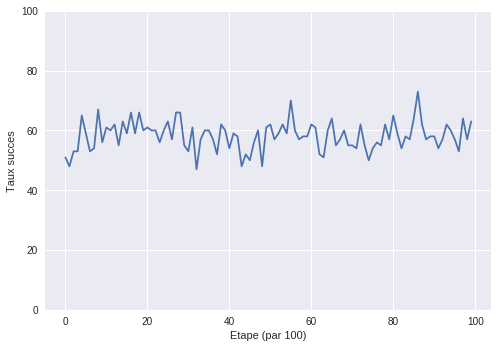

In [0]:
# Entrainement Agent Random

class AgentRandomTicTacToe:
    def __init__(self,player):
      self.player = player
      self.score = 0
      self.nb_action = 0
    
    def reset(self):
      self.score = 0
      self.nb_action = 0
      
    def get_score(self, game):
      '''score a game for the agent from the computers point of view, 10 - nb_actions = win, 0 = tie, -10 = lose, '''
      if game.get_winner() == self.player:
          return 10 - self.nb_action   
      elif game.get_winner() == '-':
          return 0
      else:
          return -1
      
    def action(self, game):
      randomCase = random.choice(self.get_liste_cases_libres(game.board))
      self.nb_action += 1
      return game.move(self.player,randomCase)
      
    def get_liste_cases_libres(self,board):
      return [i for i in board if i is not None and str(i).isdigit()]


game = GameTicTacToe()
agent1 = AgentRandomTicTacToe('X')
agent2 = AgentRandomTicTacToe('O')

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)


affichage_resultat_entrainement(cumul_score_list)

# Entrainement Agent custom simple

Score : moyenne taux succes (score > 0) = 75.78
Evolution du taux de succes :


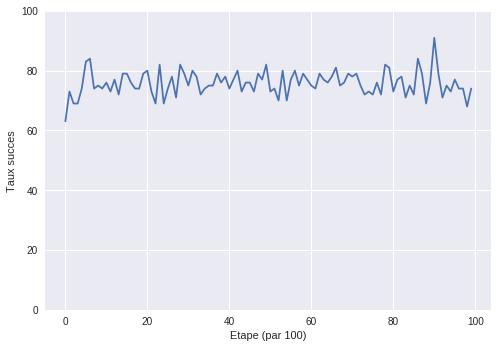

In [0]:

# Entrainement Agent Simple IA

class AgentSimpleScoreTicTacToe:
    def __init__(self,player):
      self.player = player
      self.score = 0
      self.nb_action = 0
      self.history_game_state = list()
    
    def reset(self):
      self.score = 0
      self.nb_action = 0
      
    def get_score(self, game):
      '''score a game for the agent from the computers point of view, 
         10 - nb_actions = win, 
         0 = tie, 
         -10 = lose
      '''
      if game.get_winner() == self.player:
          score = 10 - self.nb_action   
      elif game.get_winner() == '-':
          score = 0
      else:
          score = -1
      # l'historique doit contenir que des parties uniques
      nb_same_board = len([item for item in self.history_game_state if self.is_same_board(item['board'],game.board)])
      if nb_same_board == 0:
        self.history_game_state.append({'board': game.board, 'score': score})
      return score
      
    def action(self, game):
      next_case = self.get_next_case(game)
      self.nb_action += 1
      return game.move(self.player,next_case)
    
    def get_next_case(self, game):
      # si l'historique est inferieur à 3 parties, une case libre est choisie aléatoirement
      if len(self.history_game_state) < 3:
        next_case = random.choice(self.get_liste_cases_libres(game.board))
      else :
        nb_move = sum((pos == self.player) for pos in game.board) 
        if nb_move > 1 :
          list_game_state_compliance = [game_state for game_state in self.history_game_state if self.is_same_board_context(game_state['board'],game.board) and game_state['score'] > 0]
          list_best_game_state_sorted = sorted(list_game_state_compliance, key=lambda x: x['score'])

          if len(list_best_game_state_sorted) > 0:
            best_game_state = list_best_game_state_sorted[0]
            for i in range(len(best_game_state['board'])):
              if best_game_state['board'][i] == self.player and game.board[i] != self.player:
                next_case = game.board[i]
          else :
            next_case = random.choice(self.get_liste_cases_libres(game.board))
        else:  
          next_case = random.choice(self.get_liste_cases_libres(game.board))
          # dans le cas du debut de partie (nb_move <= 1), on prend une case aleatoire dans l'historique les parties les mieux notees
          list_best_game_state_sorted = sorted(self.history_game_state, key=lambda x: x['score'])
          best_game_state = list_best_game_state_sorted[0]
          for i in range(len(best_game_state['board'])):
              if best_game_state['board'][i] == self.player and str(game.board[i] ).isdigit():
                next_case = game.board[i]
        
      return next_case
    
    def is_same_board_context(self, board_in_history, board):
      is_board_compliance = True
      for index, case in enumerate(board):
        if case is not None and not str(case).isdigit() and board_in_history[index] != case:
          is_board_compliance = False
      return is_board_compliance
      
    def is_same_board(self, board_in_history, board):
      is_board_compliance = True
      for index, case in enumerate(board):
        if board_in_history[index] != case:
          is_board_compliance = False
      return is_board_compliance
    
    def get_liste_cases_libres(self,board):
      return [i for i in board if i is not None and str(i).isdigit()]


game = GameTicTacToe()
agent1 = AgentSimpleScoreTicTacToe('X')
agent2 = AgentRandomTicTacToe('O')

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)


Score : moyenne taux succes (score > 0) = 79.7
Evolution du taux de succes :


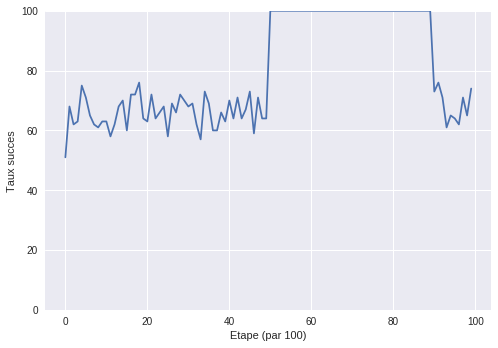

In [0]:
# Entrainement Agent Simple IA avec entrainement random + Simple IA

game = GameTicTacToe()
agent1 = AgentSimpleScoreTicTacToe('X')

# Entrainement avec Agent "Random"
agent2 = AgentRandomTicTacToe('O')
num_episodes = 5000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

# Entrainement avec Agent "Simple IA"
agent2 = AgentSimpleScoreTicTacToe('O')
agent2.history_game_state = agent1.history_game_state
for i in range(4000):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

# Entrainement avec Agent "Random" pour la validation
agent2 = AgentRandomTicTacToe('O')
for i in range(1000):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)  
  

affichage_resultat_entrainement(cumul_score_list)


## enregistrement du modele

In [0]:
#print(agent1.history_game_state)
modele_simple_ia = agent1.history_game_state
data_encoded = json.dumps(agent1.history_game_state)
data_bytes = bytes(str(data_encoded),'utf8')
model_compressed = b64.b64encode(zl.compress(data_bytes))
print (model_compressed)

data_restored = zl.decompress(b64.b64decode(model_compressed))
#print((json.loads(data_restored)))

b'eJytWMtOw0AM/JUq5yKRtIHCT+RaqeqB162iUhEnxL8TBbLsdsf2eDeXNn3syB7b40kOX83z+eny2jyuDu+fp9N61eyb8WVokqv/j+G7h+N48fFyvryNZ2/a7/VKgEJ44Wo3vfuhpKjGqxjsFmKlCNsEREISwhrUiMILTRaFF4P1clgi8T629hlbNpLJFoooRnSnWIVFNBfAUujS4xpIrPbvv5tK2onM2PTa+LwQFNPsafUAEAioPDtAldwIXZQd1sIY505gyUBJOLpn8sIF4xo8aiRWV2Be07nuFwdMMC3mQ0SztmVc1bdmju9trSVZltT9QqfXZmh9UUhqQ+Zlww0ZYhDKX65I4jagxTs93Ovp4arpZsU7b11WufpOCrmVyKSyiArHF68ld29vEDWYbFWUasc2mhHWXmo4HtGmig8Ad+y8maO7ZB/x1pKygvTImdrkMiaqyPFMyf7N0ZdCDArf5uQu1ZrJSlHoVjQXbe9ElPgWnwtH2gDKnLKOUvIUQFTKsjNVhSCc2rlZUModGMEVi5WszDKfYxZsopzlKZzeCsg+GZgXVJ4aK0zdchY+HVyRHegEWyQaGgrd1BVeotMxMiBda3UL6PS4onCD/KyHHR57oo+aJXD+5zlg2ugUcQV9fZn1dqGDk+lOf6D9BI4j/uh7ZiKx5GuojKmskgW3uom4sevNKD5Ki7BK8xqpSgvLZF5+xy1FWROZBJFbTXkwxdKMcumvQMjKy/OhVo1QNkV+r8I6/gA11dK6'


# Entrainement Agent Q-learning

Score : moyenne taux succes (score > 0) = 74.63
Evolution du taux de succes :


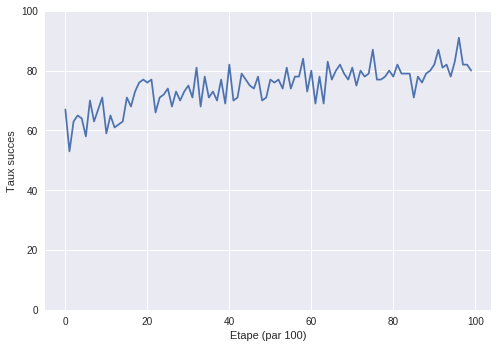

In [0]:
# Entrainement Agent Q-Learn IA avec agent random

class AgentQLearningTicTacToe:
    def __init__(self, player, epsilon=0.2, lr=0.8, gamma=0.9):
      self.player = player
      self.score = 0
      self.nb_action = 0
      self.q = {} # (state, action) keys: Q values
      self.epsilon = epsilon # e-greedy chance of random exploration
      self.lr = lr # learning rate
      self.gamma = gamma # discount factor for future rewards
    
    def reset(self):
      self.score = 0
      self.nb_action = 0
      self.last_board = (' ',)*9
      self.last_move = None
      
    def get_score(self, game):
      '''score a game for the agent from the computers point of view, 10 - nb_actions = win, 0 = tie, -10 = lose, '''
      if game.get_winner() == self.player:
          score = 10 - self.nb_action   
      elif game.get_winner() == '-':
          score = 0
      else:
          score = -1
      if self.last_move:
        self.learn(self.last_board, self.last_move, score, tuple(game.board))
      return score  
    
    def getQ(self, state, action):
        # encourage exploration; "optimistic" 1.0 initial values
        if self.q.get((state, action)) is None:
            self.q[(state, action)] = 1.0
        return self.q.get((state, action))
      
    def action(self, game):
      self.last_board = tuple(game.board)
      #print(self.last_board)
      actions = self.get_liste_cases_libres(game.board)
      if random.random() < self.epsilon: # explore!  
        randomCase = random.choice(actions)
        self.nb_action += 1
        return game.move(self.player,randomCase)
      qs = [self.getQ(self.last_board, a) for a in actions]
      maxQ = max(qs)
      if qs.count(maxQ) > 1:
        # more than 1 best option; choose among them randomly
        best_options = [i for i in range(len(actions)) if qs[i] == maxQ]
        i = random.choice(best_options)
      else:
        i = qs.index(maxQ)

      self.last_move = actions[i]
      return game.move(self.player,actions[i])
    
    def learn(self, state, action, reward, result_state):
        prev = self.getQ(state, action)
        maxqnew = max([self.getQ(result_state, a) for a in self.get_liste_cases_libres(state)])
        self.q[(state, action)] = prev + self.lr * ((reward + self.gamma*maxqnew) - prev)
      
    def get_liste_cases_libres(self,board):
      return [i for i in board if i is not None and str(i).isdigit()]



game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.08, lr=0.85, gamma=0.9)
agent2 = AgentRandomTicTacToe('O')

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)


Score : moyenne taux succes (score > 0) = 85.49363636363637
Evolution du taux de succes :


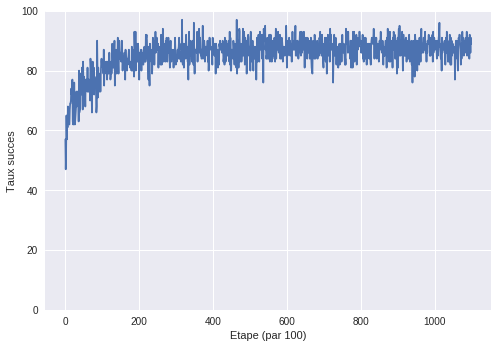

In [0]:
# Exploration à 12%


game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.20, lr=0.85, gamma=0.9)
agent2 = AgentRandomTicTacToe('O')

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

agent1.epsilon=0.08
num_episodes = 100000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

affichage_resultat_entrainement(cumul_score_list)

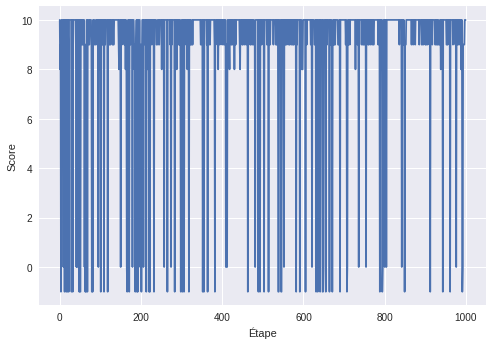

In [0]:
plt.plot(cumul_score_list[:])
plt.ylabel('Score')
plt.xlabel('Étape')
plt.show()

# Entrainement Q-Learn IA avec Simple IA

Score : moyenne taux succes (score > 0) = 93.19
Evolution du taux de succes :


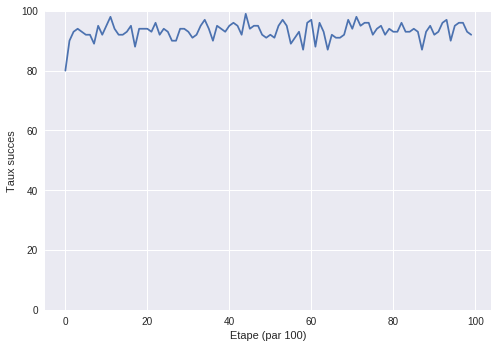

In [0]:
# Entrainement Q-Learn IA avec agent Simple IA


game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.08, lr=0.85, gamma=0.9)
agent2 = AgentSimpleScoreTicTacToe('O')
agent2.history_game_state = modele_simple_ia

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)

Score : moyenne taux succes (score > 0) = 91.445
Evolution du taux de succes :


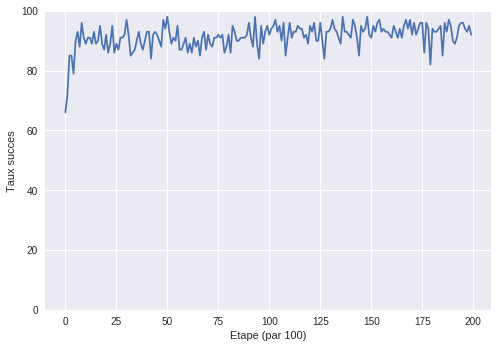

In [0]:
# Entrainement Q-Learn IA avec agent Simple IA

# exploration 12%


game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.20, lr=0.85, gamma=0.9)
agent2 = AgentSimpleScoreTicTacToe('O')
agent2.history_game_state = modele_simple_ia

num_episodes = 10000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)
  
agent1.epsilon=0.08
num_episodes = 10000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)

# Entrainement Q-Learn IA avec agent Simple IA et agent random

Score : moyenne taux succes (score > 0) = 92.61
Evolution du taux de succes :


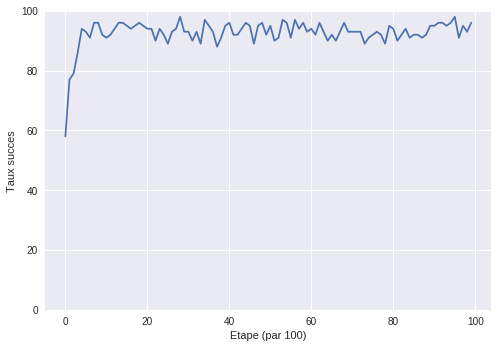

In [0]:
# Entrainement Q-Learn IA avec agent Simple IA et agent random

game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.08, lr=0.85, gamma=0.9)
agent2 = AgentRandomTicTacToe('O')

num_episodes = 100
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

agent2 = AgentSimpleScoreTicTacToe('O')
agent2.history_game_state = modele_simple_ia

num_episodes = 9900
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)

Score : moyenne taux succes (score > 0) = 74.96
Evolution du taux de succes :


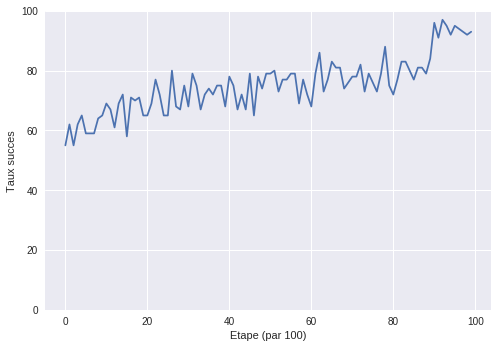

In [0]:
# Entrainement Q-Learn IA avec agent Simple IA et agent random

# exploration 12%


game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.12, lr=0.85, gamma=0.9)
agent2 = AgentRandomTicTacToe('O')

num_episodes = 9000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

agent2 = AgentSimpleScoreTicTacToe('O')
agent2.history_game_state = modele_simple_ia

num_episodes = 1000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)

Score : moyenne taux succes (score > 0) = 86.18
Evolution du taux de succes :


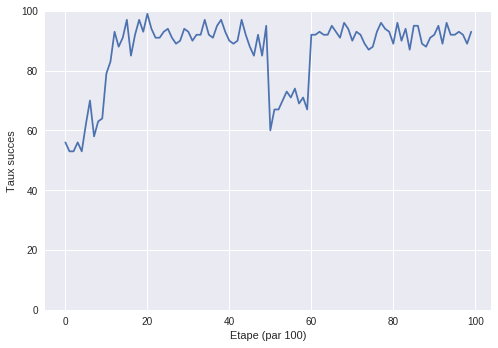

In [0]:
# Entrainement Q-Learn IA avec agent Simple IA et agent random

game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.08, lr=0.85, gamma=0.9)
agent_r = AgentRandomTicTacToe('O')
agent2 = agent_r

num_episodes = 1000
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

agent_s = AgentSimpleScoreTicTacToe('O')
agent_s.history_game_state = modele_simple_ia
agent2 = agent_s

num_episodes = 4000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)
  
agent2 = agent_r

num_episodes = 1000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)

agent2 = agent_s

num_episodes = 4000
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



affichage_resultat_entrainement(cumul_score_list)

## enregistrement du modele

In [0]:

q_model_encoded = encode_model(agent1.q)
print(q_model_encoded)
print(len(q_model_encoded))
#print(agent1.q)
#print(decode_model(q_model_encoded))



b'eJys/UmW5LiyRYlOJdbtaCfSFgmizJxDWtcnkN3MAfzJf1KVBQqRIwfq4e8tu+Ye2KIglAAEAin+f//7v/+///f/+fef9d9/3L//bP/+4//9J/z7T/z3n/TvP/nff8r/tf7v//xn/Vn+/cds6eiWG93S0y0D3TLSLRPdMtMti9ny9ee1//h9caNft7a/gbq1/S3Ure1vom5tfxt1a/sbqVsbI/hperfff1ijKBDGSAqEMZoCYYyoQPSj+v6vN/NpZj8LR/XPw1HvZ1p+ctn/5OBdKptfnSSk4qa6DDnQacipX8XTjFkSxdbqqyS2Vl8jsbU6ccTW6nImtlaXNLG1Oimb1s/4f0Zx+VmiL/WfMCHB/bUEbrRrIv71ZxZDwgPO9JyjrN5zUr58gvG391MsP0Ug+0kqs913d31mvelWbxvfek62sHqA1sLWCFoLMxy0FmY4aC3M2WeIr0WeGkWd0MZGJ7Qn1gntqXWif/JrI+iY91/6njnvfHRhOf+4KSH7j2FIWK5/TJbTvuZrcpr6PmgNJorQGrz6Qmvw6gutwasvtBY2N9B6eF2GBe6ZWrJubROibgeJfnxsIp3aWV689zGnYwH3fkIAv/I/63crQ1VjTUp/XERdj5zCuiXnc9xWlzIhhNC8CY7vdMuJc106E4kqJm49vJuwtbhaqa2HcYKth9GBrfs5i1uLS7zrX+1n1OEoKgQYSYUA46MQYIwUQnty/MZpT0/Mi31F2BeELfiwT659b0yTQrRHrHTA48cXXZY57UuwOPm09f7PnZnn2HblU6LWWj4laq3l86rWWjbGaK3nnlI+U2qt5TNlp8jcCsz5L5+R3F8yl5fFpxJLXJa8TQoBAwwoWeeq3wr0efvRZg0k2+wMojZzNNjONrbOpreWdDa9taSz6a0lnU1vPfeUks6mt5ZV/K799a3d4wKVG1NC+GsJ+vumEfmvP9NU6lQJ1277uo/yfytFXJpNih8DdeZVkj72y3Ur26

# utilisation du modele

In [0]:
game = GameTicTacToe()
agent1 = AgentQLearningTicTacToe('X', epsilon=0.08, lr=0.85, gamma=0.9)
agent1.q = decode_model(q_model_encoded)
agent2 = AgentRandomTicTacToe('O')

score_agent1 = 0
winner, score_agent1, score_agent2 = play(agent1, agent2)
print (f"winner = {winner}, score_agent1 = {score_agent1}, score_agent2 = {score_agent2}")

winner = X, score_agent1 = 9, score_agent2 = -1


In [0]:
# test du modele sur certains cas

#q_model_encoded = b'eJydfUuW7biu3FRq3c7tpHNJ/El6noNf903AXXsAXp67pb1FChQjgkhX9Q6R2hRFAoHAh//nX//jf/+v//nzz/rzT/j5J/78k37+yT//lJ9/tp9/9p9/jv++/us//ll/l59/ppLBLRndksktmd2SxS25uSV3t+Qxl/SsuWe1PevsWWHP2npWlaxnsm+9/O7H+d8S1+0o+5YOIoxfP8mXSnKqiU/yGkIf5fPv128tv0tJh/0vD3JlIgd/pP3C8I/vl7CLzU4kknnvESTzngCSee8RJPNeWiTzPklI5n2GxtlOFvo1b7/09ifp/U/S4K22tvrL75bDvi/rEo5YYoyD2Htx67+Dx45fNJEnTPXV5rARm8M6bA67sDkswuawBXC5kAx999ze+vwuW1jynnNcS1pKJML09bN88SxfJ6NJsmfap6lN2T33VMf7sq9LyuGUKbF0YvA3hul+/lFto+LYRsWxjYpjGxXHNqoyyqQVxzYqZBvp2ep56hnquYFZLb+HHS5kQoX8WDEPOm11LtceWY9jX1ITG94f7QU7NQY7BxnwnQcZ8J0HGfCdBxnwnQcZAAIHGfzu4gREua/jay/c8OnY9rDGLe6BCOPXYRt25dNjT8PPeT+BHHkLmpla6GUoHMyzI9/LYFXby1D4mGdqoZcBq/yyqXNYaa2iXxq85csy+p91n/4lLhdaL1tYw/5YiVsQ4Y3cPIt7055mphzHuoUwiL2X82tkjt/jQkMhlT0s2xLb30mLWWaOrZFRVrvMnFkj45kPtTZGhrqZRgZsq/dbfxb8VNang5WJHJjxa66TLaJn/Zrv5FmFfK/inEtx/k7wkR8e2sNDTnhoCQ8h4aEipiTES+G6vi5TJi9l6X+WQ/W8FOhcGn7FB1efZ2HbjhPCL2UtJ4wvgxhYLPhMuBTMieh4IYeJ2x0mbneYuN1h4naHidsdJm4f9mKqzuxyfrOQt7jlbbUoJd3uybEaL/neFqeyD93HHXgBChoF34FkKGgUfAeSoaBR8B1IhgJmtr3NqHpf/ab6HQcHMa4hnV/0DRMIb5bRT6fmPn5OZd7yad3zsaft2SGZrH8m65nJGmZ0FjLatJ9/nNAgHqrcQ5J76HEPMe6hxD3ENVw6PVs9Tz1DPTfPrO75GBo5xFOzh0EMTww+Fr4jfML45y8OfErLMlSJZBQty3AcklFUMsNwSAbTsmy24zznVKkXf45z90vPUEUy7/PfTsHjSOnSfbfgPgher7b/ppC28SGOF2mv8P2xYy3pExi5/tsGwWMm2NkXbTG1rdRWUttHQk1t9fAuYTvSWrblWtp1H8Tw4R0fm9BbwCfAP39BGqHk9QFHMhOoJhS4PrxIBit5fXg7AaSyzChQRGbU+PgxXzhh2U+gQISBLjKjQAuJGYrpdXPDQ2AmbBprrwwFldfLqPMlWKtBRp01wVoNMgqvMtZKz1bPU89Qz80zq+8zL3W45WBVrFHSt763DscYCmIeWi8zD3HtjhAX8+J6mXmIi3lovQzeyswwMJMwqs5gfuVWiF+vb9/3smzlIu2IMNUmcA/1o3oaWMdtZnrxCHGLKRpTXYXwtIDN+TwOuKthRmlrMlvTz90x+a50+y8lIoydGja99hn3ClOW3jWrYuix8JnwTWcQGh41JDOB0PCoIZkJhIaECZJR2Q+MMOkYlXtjcbTYS89iAr30DID30spMb54siYKOVCJPT+a5Zv99N3f3WJGHNKV1exmqzHUAcpDxzIcq6imt28sA3/XBGde6nYh6OU4Fty1lj4MYAOVQTQw6j2xtq88mW+sV5fRLzxyoXnq2MXtpoIiK831ckYkqV4m0DwGdwhLDGtcOIBek8GAOWJHqU3MPmnXQfINmGp53/CzBFZ0+X/Qob2E2PTaxSifvRwp5jSXny3abnf154Pa7GXQX7x1mEh8+j+mlHuDAfR+GCaD/a4Y4SJmlyUxpxmng0shM0mSmNOM0cGlkFM0oApdNQCeENA13w56yxRDXHvYYYZUTorNB2CS7uOqS17SUE/yFQQqjZ0I6vt94xAtTKhF6mUhmjoOmVCIEp0hmjoPggrBXjvxNI59Y5PPRFqDDa+QTDDKKIGEBJSQjYRcBE0hGwkzO5kI2pf67J7+5QdxP2OjU2eFYtrTm8ogNGJiEAZgW0/pLay6ts4C26rDotsbj9bZzNNPppOtx51OuQNrHtVoHMYyMXRQ3U19WD0+pDh2M7mXmaZia6tDB6F5mnobJqA7x1lG+S5QzjHJusZ/V8XuEsJQjlaP0uKjSK440io/c9bT99zxPy/PfOq5Kdnxt4W0jmUkalCathCeNZOjX1p507N/I6wjsf3JJ5oowyN0Rht0xfxbEqA9d17RU2dZtC8bzC87tVeXwZLfpNKMEJFHCjCgBRpTQIs5AxTXK5tNyDJelnHAubHtKwysNE8rVvTDORP5IvdwQYHJpKF1ACSRDw+oCSiAZHKXTUALJ0AQCth0EG9yPdvmjMZxG8yjLQYTp67DdkTyR6RZM0+FBHRjUIUEdxBPhu91Q2+tpV46w5z2VMohhgDpq0R041N+/Lr97AYvSbIxrCV26uZemi9a0q/9ZMzW23hxjrfwpZTsVQzpS2nMapHw52aNSrX95jNric1Y+aOF86JaOWNJ6hEGKnJlRL4BsuzHmx7CRZtuRzDyWCTHClG1HMvNYJkSEJjRGEtf4u+jwnA7MiZCc3ekTjO/a84n8TgPMfyBtk9HhfmnKNvyBpE1GbU+kGVPi/bX2O+fJW4+clnUpy+m0hk6Pwp+A7jjLEvtDmMdIY3rHhnX4KKZrbBjHurihpBdFyvjRhwH9mJ5PqUFI+76GOIippBsdsOllVNINA09IRiXd6IBNL6OSbhgwsuZIvLWIEndHrPHtp4natrgnIkxfh0WJ2wS4rwnfAP4aQ1/iU0xjeb2MbBYw2xrTWF6SmBnJ0K0hMHNddQcT0IycsGGQyutHqQ0rxAab0Yfk+2YgnofflHWtZnbz0p3vPCWrYea7ntvdyO2DWPko8v3U40eX57HaqQ9QWLO9mufttobJzbj0aYlEWE8Dw/3v9I7PqS9x3Za4hjzI4EmOZbrzziCe7jCevjCejjCeXjCeLjCe/i/CY4Wz1fMEM+y7nJQjEWHlpI8fjFNwguUT5J56IKfyOMeso5c6bqkjljrGCE/Mdya913oA7mYdgUj9emFPOZdSmDCujBOG4oUe5rVtGkf07Nec6J3Wu0K6BsnMid5pvasAJprVOyjZVhodepml+KGLtjW86aKx4U799yH6MuaWf2S4rbKKRmex7V1Mu/ZDyuxRKoCrU9igwwmf2T3tU6GVYi5bKcthci7YU208xkvAV2m3e9nggl/ax30njg6iRAdmFHtqIm4bJRyIr/P/Tn8odv/C5xsqhKbPb+aLL9dx2WPK8VhKjywEO9OP6mmA2jvIpzAmhXEo8CHwCXgagJLLtSy1NxYD+a0guHA+pqQ+klGgXNidKamPZHD7is7aPNxBiiXsG5HFby/sRJIWInHb0EbZZ2FAsw7RyYiZ6KViPprgTNPrrLW0gQxco9QfPUenOk6OlkZ+g38HS9NYJG4Q4SPh8x5Kqv8Ri4nZgRtkJmw1O5SDzIStZodykJlUFLEK5mKU8x0DW4+4rk8rFOqvd556p+p0DkH3Vq+qrkHo/XD2KjvAbKzm+rsomhPUbKDmATUD2Cf+nLAsXp0j9pfs1+G66zD3LX088evYjYLBK5ingiTua5Fk2k9ocMRl2UzThSo2w01VjqRW2Fc59jUs+Vt/ug2C0StYZu88lJBwCCbQmYBmLKURGh8zRPeuoE3qqKIrNVGpKcp+737C5TGOmxe2Og31A387HqbrzIe4LacLMIg5KMqAJvpYw6dB0bv9w0pg20qsViDgFnpMtMC0VT6djuN5drZ1Oc5tmwYxUk7KILEn+PSRe8q/Sa352uIpBFGYUdqwiEUuzShtQAQXfwfxZRH9FLhMcICa/dO8n2D82psx0GNGZQso3fxJt30S6y0+svjC4vPymbC8L7ah+lEan4TbrR/Vv4vtkJdbYDObBhKq2DW547dcYsOYIyHOREtm9EYv7TPTLIrTj85UdS89eyvGRL2DAV8Tsu97OPVpLiERYf0olTCvU+VpYj9L5mczqdj78zpLPhcmlZLfWyVZNVFZmm9MNqVAhGnVxmeU0n0irJ+IThnME9OUnznJOFyqtIiUMnNxRABfa+KXduRfvdbML02LLHRJyONX9pUDeT2IMN3kuo5D9ONhTRqOh+U7zmXYz+0Zctn2QYx2Xx9htBkiHUDRO5oh3PUBIuxuk0s+tpeRB43HdQcZeegkx9vLKN5chH8LscRejnsI28e8niB/sygT/gZkFyC10KI3Oh6lI1E6BqWjRsIzY3iKgakxO2q/SLg3ErB06FBgGom/Z4bw5mQGrg7RmgJm+Fj8rx/FRpDxtP0oVpgdT/ulMcOVWHe6psl04kxmerOWW8Jnr5EpX8RnDrTunSAD2zoFSScN6XQhwcOzHWBBmDfB0JvbaVGZX9r3KQRqgykM9d+J62EM3ffnPsV2XSJOhM+ED9QpltIQZYch0kEgJCOTOqUh0kEgJKMSWYVj2LwePqrelPVbyb0ZO8bzb32QSjGdiD2dzggRVvBAAwMNCVyZy+kHt354shS+BijkDyc1ti0iPSJUBbxI93c5q730X0C4SOzv0Ml1YmPZ97jErXTUIKQuxzVYK6cGODl+YF9hHwdvZw6kX9pR8vcKCs2l2fs0zL/FFOKnM1fKMa2D2HDO7+K4CynmZV3XtKfzY5hx3Cghc/BnRnF0jrkL/SiOEDKn4R6ydZL7ieRCSOsW1kHMd3cOuK8AefSQj4N/Hn+UnYiD9p9M8W0HblW4h3iFspKJ40VpEOJgCuY/PKr9aM7+Xdq0nxtqP8JheP9odcDwAVlYNw6nlo/SylL27q9T+PqKbEpiPmIyYiZiGtbgeboDaOYmVnwtalU7h7lGh8OlqM//iOwsCNJL+5hVhk8SYSlgshvMjJu2AmcmdJCZ50VP20UWNHMkM8+L1n0WMjl+Nk9B1wnuVsfWC4q2DJAAZJH7UZV2AXUEVDvjr0Ty52Oi5+cfUZ4o4WZgmRQjaxvFePxuZc17i0M8h1G7Bdoh0K6AdgI0/F/N+ROJOMLI11H6/YWRT8TIr/fBxaFFlmLV8OZ1wd/pKoawpBMadTHXBJ8JH8hvwenC3hfzlomMumkFHl8zirPN6yiem4uehyim/nuDF6Vc5S7hNO7ZFDtcYvB2FvjA4R1qAdFYvgyfCimB+u9Io8CHwCfIlCF9vYu+2EVf6dLnfn3/62IJvTD4ypD2hK3d9e294h2FrUvSgnVO4XX/6ZVpdaHDiyYsRBh4daOrtxrKbrK9GQFn064rej7Vw7E9iw9ZQfg8QaUIf9SMxqap0lMqQGQpbyxIHwYwyw3H7AkcO1DaRAu44cyozITWOdA6+/nF16MWgZ/o5ZiIuN6wsUtp/rSwXFMcxTxBUpbI4i3vZFCfxat0pErHqHR0CsSlvlasZLIPWZy9DvF2haLIRVS4kGT2Qg5oP0qzr0W6PTtK/Sg4JJBRrP/+7ROW8xpsTWdDvU+qzdWX5NRHJe05bKcXXYiwaqwj0kYgmuhHAYC201viCaTidWFy2tY0SDncwfYrrobVT46STVceCmPZugS5LkGuS5Drwgitjsr6tJkpx5b2tOVTa+2DGOXgdeRBxxx0tEHHB+D+jsYLnFNoFtnkqzHeBxiHbRCb7YKCzjgk52GEyfrALjhspJV/Dy9SMKNjjsj1HxGmsVV2bwsEXWYIb3IWeGHQq95Ka8FBvQ1JcEywH9vI4UeCNKJEGmaUkswMaUSJNOILaYw+c6sJoJeRjD9b85KOPnOApV02JdQ6SsZTdWypZ/Rx8iQoZwsfqaGzl4m0qSVmPaEEJyUifP3oPp6PYrQDfP6HnRmcmM8kX4APpnbaMzfPIWheifCMhFvEmD/GV9QhBM908+0/KbXibM5WpWULWGd+RZX25DCxLq4Vu3+uHU1x3bfTiRz6c8P5RudMoZKq/17z9+nJt7tbRMdgRLof7ezm+4JnI6fOF3Uvppulyr039rcrxCwrtCcXpfom+AXJSFXOkfwgQyOLwj1CMoMTTQg8Rt11pF0tRFuuLJZU+maABYUrtGbWK6/XXK+2Xh+4Moern3Gy5Gm9ifaIgy5m2pbcD8dsbOds4SFcBsQ8BOYesGB3w9k686yXUZ09xGEaZDzzUV07dE5bLwOiqo0r55uiSh2DXU9ksZidsup4bqeqtM9Cduqa/rIPZVilPSnPaMrZIzezeh1WNq7asZ76KA5iJAwlL7UXtWyCV+4Q5p3nt+e0nbM7YiDCqhCL5TITujBU2mmOGeyehooR6pp+VCXEsEaoVOlMTtc6M9HaqGpz+jakd/PIT2LKnpewE2HstbO94+0w7KKYJs1xJ6OyDYFuQKBbD4zu8qQxEXwkfFIWLgUzRQ/9tl2pPXs+wolW3uWrILY2aTK5ooD7WmPowjiysEo/Sq9aFCZM8LuRbxd2xOv9EHu5HFzrot6Bl1PRxv5e6UIi6GaIBgAE+y+o/8mt5/qSIn09USPC9iWlq0tA7IN/QR6JII/Ey6slQzz/VyT/8pmAaYD26YUrbphy0FJUjt9ty/u1KXI8bV55e1jJUz3K8rtYIlzb71c+6BpLijEdYbW+p87Ok0M0a0+k7ImbIPDJlPfbezsyV2l3t7LsQVm9tK+8okqjGx3RBVojGxrRnz/RVERD9aPqrucRbPWj+nchx6WIe92m9LDG6VtVtMeEbs1JaKf2oyoXD6tJmP9CDEUmaC+/6IC1LHvfoY1BCqs5T91xmuV0bJeyPVVtGaSQ3eA4RODaJHFtMhvMVTvgihv20qaWALYZAbGLFupgzEDqz4ajtsOcBr+0o2lI6k+Li6huvNAseWE0l/XfVdu42bON4HvPmCGqc4TCEdoG+T+4hhmyZgGp04DiOIE5urKocveoe1c4ospNa/PDE2B3BwbaefBLqwJe760t3kSAgRnflpLD6VEu1z3IgximKebsiuBwYbAZwu0OUNsbm68UyiZ1gFjd2haEM7iaNdc8t2a4tSceuUkzo4qi1PfLgTzIy4S/mR6bMzBysIzsZXSuzQ8+N9KeTrN7/h/tj1Ycxq+SEffIiEtkeKobaO9BPrpNcXIZCPYmZlTewaFv39D3brDMGtDEu45Mi1laFoCjXKolod6tzy6cWPp0FMZl2tAZGeI9PkX3U/VbQ99FXQCiy1V0oYouUdHFKci3qxoQe9CW3JDK+KOJ4MYg/j5DyGaINxwS3YZE9b5oGSD6BYhmAeq3aH8zwZLVUcqyi5BQ5vbCjAKPiE1JzEdMRsxETePz68dvSsnmr34+M0qHSdLsJml2k9HDd4/tLjuxl6IFWGI566FRPb7ZyjEA04+qpt5wVqzb3NdEfxdjZD2NAL4cPcuMR5HuKHIdWT2R3aeuC3m81jbJo5X6De1/1gy/Vh7BMcNcFcqsWLS6MfSSbpGJzKiifhRnIjOqqGEK+Ie5R8iOQm/zmfzS+pd9V+luzo+af55iO4+czrcIxAoCUgrkLd7GyNtWxxn8fjidGdE3TYVIP8pDGmQUtJmmQqQf5VENMjjAAkHEyycnQ/wuCnERBWfJxV0m7LdgKqMZoiEUdm+nKOcQtRxCz4oqDvhRGHBrNOmcWZtmyRlgqVwxyNEJlNuPNm/6Zh+uE9iXSgnom5wqZzX6BGVQtMU4kunD2i1GO86eIr77G78KaAJycALyawJyWNhS2zO2hWA+ZxrEMsM6qY9TuzhfF8jopd3ss8s+9dJAb8GmSQzWM+DOHg79nOqck+RgRPqaIRzfEGUA0DmPBhF7i2BYKK0fdTR8yT1e8kvPPrYwJQyHH88d1nEpMX/VSxykfGHR4z49qAszVtDNKrfOWaWsW9hNnRwzzJrknDFOgRAtY28JfAEZjnuSun57/8S5NOu+7OG6PSEOgtkrWByCzWliRGEdlemoOhFVp6ByxMVUgBmls3JRhb30cz9KLuc++F5xAUItUFvcQ/OKoSo4jesYdzzNHnrLggzaCOq9r4crfEqZgxG6ljtGeKzb8bmc9fUeX1OLwMI8UrYa+zC7n6/Ob7pSt3i9UxbTFc5MUJY67zK5HwWhIWYwamRSMQlw+SR62zks3BcQ9sIG/fkobaAM3ROGkasfoUeVn/h0M6qJaVdlkWlZ2wsrV3FuZW10xSOH0/v2m9PsTWUdc6DohE7zStYRvjP4QuTPBee8Sb4aEp396LtCKh1bKm8zVoXVhSeMGbRkxHxNBZ2giYQ3hdC3gUmZ/RCCL4PugW6xzX2ZqBBv9oKjoCMYvXH8bumKvL2Vn0Ovj/2DRkj1dV7G+Fn9dweHGp7Xp6nHIsJjUf3xu9qUtLwRWV+6BONEn6EuF+6oJRMnNI5EmLQuI1u2H9XTGC6I44kJY13XtSVIeYGoWmBEkEgGF5ngzAE2OAx3hoSxGBGIEVEYEYL5bvHtd00HI1dEBp9I32NmfOU2fOUG3KLkPyQkeS2akaYuR0sg8z/LgdfKXO1lAHZvWO10jreJUoT0RuLn5MUwkSGCPtA5EURRi2uyVm4s90AkHrCsAzOE8CVHbw8Na2xvKGnrL6wzwvKCdX21ur5UnSSKNKrpSJdr0jbBG6gm7hwn7hkn7qwnktdShwA/NnJ30fy6o+crcFh70zfz4HvDTS8AWxHIfigIGYOGmr8fHXv6db0temF1Qxq+JwbZHZhzO0pCp+lxZPiLswyIftQ2vTmxR9iOVytykQfRj+JbTmYpyFXK0ck6tSjs7VXli+V/eWL73Vskb2kbx7Zhs0JtB5UZS56CnyASxdy2irioQdzSwFz1zIN3Gdn4yjY5vOBRRUVCCmzIoMBLkEfJcCf8fnNQBma5eKMgMMsMrefYgYDF6Kq1xPk2s96DVWrceRF9s7VyeCKdGPrakag5M0RzjCFpD3/FFfyocr7kl3KXm+7pGJvwznMjUsVTXEpE7CE+EOBAIAMBC8wQyj3nCdxFplcUmVhR2m74dP/7kGVfswZamsEk/H4U44SqSHCyUR2lbQ8hGu5HcSpSHa1Rpdr8MsS4phdqIIlQsytHq9gGbE2FNV0PVnT8EnFVveUbsWcLz+lu+7Y+oPJtIOetpaqcO5ENEroip4Fl7poh3jSW3eHt5FvSXRLbGxCziDQpTmTEscacsMzJDMGe9gAoYC8D2WzoIWaD847f6yaVI14Xw4wGdMz6qCOjdVrNwZ52pgBPTtxOpR/cILYhklnXrlGNJu7niRQ1kZkmkqxF/phsQuCrrKw9dHr8eh0Q0mz+uFml12fNxli//wiW2+FLq3Cq5z7vKJk8SCFWRdSZxFpodT1zu3IVMnq6yHEVCa4ifxWSYWYI+zfz9mzWZx/OGLvsYdyX9d893bmqHVLedPAkfERkvRt3yDL/GHqsQ+KBlKdk50rwy2aUpho9TtoNIuJeliVssWdrjDAuBtDUs/bSwSmbkIhsP0asywOht6Gj6Uq7YJkbJo4/LQVjCQlmiF8tJe6VEpdKITK0pWC7+kYVp2MTOXQSxKNgHQXlWIfI5XrzjIoWXxWdv0TbL0bkQ1LCDBFYTE6zCNmKeK3I92ZhrzyJEVTi0weg54UKa00jQd8O3mHcts/UM+7U37rlnEu72KhjN5vJBOSLy5lPBDC135/fYR/+hRJ6IgoRrCja2KA3dfm4LypcTZZaWocwKypUvmBlBWcoGFi4jaMINNVey3VDIHPLdqRD+dkSndGYH+RDj02WWLipucMzx2Rmhar7M56yVa3ezDpatxEg+egk0SzPyvLZo6G3+jeAG3AD8c1kvENHVbbR0FJHtsD5/F6Juf2tyfhHP29heVgamogIioAfM72BmN4VNXPOP9gzMUO4nwp05MwQbt3EEk8a4tx/0xK38VIOWj491+MBkwE3SJm0Q1yNsneFguCtBYyZMkOccBRsI68CZkUOLIhbh3gjJnETHwlDzJUSw3BN2aMgrsj7E0l/MGfGDNFiekqecA9PuHfMBjFjunJjuhJvxFX5Y6cy2/2VAKWeO4wiJKQ7VrN7SWdmBrdFhqRIj3znRuIhnr5Jg4Ja7RgXG4b0CKNMslzqEC/l48kXrPMGjBwHEej1tBv7yI0NNyLZH9lFrlq+dHA74HkyQJhfl0eibwWpJJEf9koOI0MDhecCgXttpjnWE8heZrirCcvIZ7ylGcK9UFgiPuMtK9T2sIWWsfEl3ImYpAhIinw/EXsUza9Exy3RbosYV5YmGSWSyiQtSaTmiLycRPSYGcLTYB5g3R60sQ/rUTMrbFkfy0KjgywhlfFCdYhGByE931TPvO/UzMMxuBldh4XOdP13R3IoK6SBixgqCQy+2ufHZmVB8wCv3aJKDu7IIm0Bu6m+oEeZIUrAwBbIdQjs4MwVBPvCZojcrEwUBHO1MlqHTKh4cHrBRct1IzsQZ0ss0Rwh8lNhdlb2IN0qp60O85qqD6DimUSnmlF4O/NGhB04y0hjgl0D24Pda8a0PMuM/2QP+OIUSaN9FJljNVcgatmsw0sfuJSJrflAafbQZzZDvI5RFDHytia43Ta8BEdkalfVBe8kIRYtVHdhRqLN04QsrpkHorOHvszE9Q9ode7V9PS0aJtz/00hbaPGmub71fwRvF/LfXXDcNoKeSEzBI4Fq/8xQ/RGFRYL9pYoQjO6Gl/fk4LpCf2xBEhXk5LoUve5nuqZeyHue+OVViMqM0O0qgsmJtvqPjJE2pt5qO7qKCO6Beoofn0GzMpOyBnJVEGFh38XpUUEJxGyxkYc998SIkpGa6s/4yIq7KetQ8XN0eLaaHajLnQxKqaZfd8h3AoM+2aWZsnrcWK714UBTBmF5xzgPCSYM2SGKNiAkT4GyM0QhjvwgSIcw0IbdrFefwWTbBvYfmfqhse2UKaJwQqYnWyGKAnFWPpj3lwkPpAC+JqJLIsZonlvsAmiSK6qHCNKUEMLpq59UkP8OigSjIMEoBlirat85gyelhUtBMOqzUIP6hYnJsADKOq8ESpjljBwcxe4uQvc3DVNSaIQuPMMpPdTD4nIEL19YtQzZogytqLq1ZEw8MjymJ+4YU5cL8cyu2A8tr3NuP/MEL8rSFwUJG4JYkkw05SQew98JgSq796vUJCuWg2Hdvwu6+tqtjoZ0Q5apKOLNtFQF9Qhku054V0YAml41bX/+El3MjWCTtmMxiRDqP6P0ySMI6naEnXJqbvGobZbcMvlVjHKmjEvdYjeGMAoa2iNMtmkrMoke/zFERUmrtcdSi5V/e7Mw0BeMMOV9+kY6v0CP8CBH+DAT2kdopdcwCvXvbygjf6/vtpoHGCkJaLD0oCX6JQl2mSJphoMM0USWGEG2KBcdl2aI7kt1304FMWmmink2HueDyXy71negBnCqEl00xHdKllPMhiVtIUNsp2Ia8OuA2iYdi50NqWf9UEMiF22tgelijFGZNxyIgBbfcia9XD1U/42dvr89/hcCaF7c8QxFmEoMBADbYaosmKBcIgCIydpIt/bke/tyPd2lHtbeNgNEAPznqqVkLuH5UrPK6+qczt1uqHjbLWmM2oMlqbxMrNcZVKEaU021MKkFQO9iXi0EGZI/BUlaWD+qWZLawfh4Yble3SbfbDK9qONVcdgHdTH33ZU7MUfR80x5NyY09rcc/liyay2p9w5zh4YfkDLvdWcy3ckph1nUVPHXCkWs6hDtHc3t5izhchGRzu2DKTIY3UfRizjvTxmn0+gOo3TwriEodFK8g8aw/JYuvkitPSA9Td+DmGT36xw0+q4OFzc2wXAbqP0yu8Gtlzi6U0slyM8iH2amt6M4SwTEPEUwaxYn29pUBW6zvnx62RGr8F6gGrAwWWXiso/Pu7T8GO0rHN7VjDFuGzpE70A/ASsH0pGqThuQxV9T0TTE3GJjLg7BvqBmUArM4QJNpgma4YwmTdpyFcN2gfHltC6uXQHtsZBPPcNKJ/nvfIQLBrdTW/Ag+iTJLsRDxR2B2Ih4WAA36y3rSMff+zWUY/dfXX3qy3uvfudnR42eI2CYfj4ZTz1e5wIKi977P/cVVBVt4oO3ducql7/VKZzCmheMeEXUmJEoxnCt/XCk2SGgPmpU6bOF750FgKDSRdeim4TPzHl+cN+R9R5u6ognF1K859gZnb2YM6E5WpckademcdBIEa7/SB2Vy1hxKJorjln4au6pmkJPq/TyBKbi26DIDGadsJ6cRZHN7FOXGt/QN8qcjiWeUQh9yeDDIGcG3bQMz/oFuM74igmaDppBDZrHVz5ftSAKvTDcAuLe1LEJSni3hbWCjaiUN5qlMwETzauYt6FpmADF3jUoBLzuA8MVDD2zKJ/d0QnWbFbpRJ8Bt16YcvvGpZ03ady/80eEO7Ezf4dpK8DwGT0Ro12H7UNxGsrSfVqCN1T3Y2sWuS4IHJ1Ebm6iFxdRK4u4r1Ozrve5t5L9DzNkLo4pg5daBMsYK6m72pSb6qwKqC9N1+Pyw0pCcIZQldB9yI/FJWGDZAFtWznjG5xXRck8EkwazK8NL0PFzYbYI6Wt1skI182z760WsCRSd65i5RGShwwGaKYXHvCiQBWqdOcW8euoRELTm6xxL86hHFoQWp07YHbqAVYdmZL4QFZ9ExbQ2tQ3Q7HLWttX0G3NxGlvJrjNbkoBq8pS0F1RTyDATUj40Ja1ycnZnDss9VgvllxICFLWoKUK3GRHQioh8IAWmb0dSOXpj08XHRrfKuQt1lmR4ORbGYIs0kiNu+qrQpm46ColrM8q2O25KEg8Tjg6CWjFpzRSn4vBr/QkQRPxPfDAMe1VuxcPGSLbJ3t6P6UnNov9PrYWb0D/GD4j+0lHfceMlcnewD5ho6Gdejvu0bXct+ud1hDHrg6zh0Im7QdTZ0FE/50cx623+PAdyZF8/NVjUwc+Ty/8LueUBw3tZoJxsUIw5c92YxVzlMIB505E5DCJUKW5X93J3skeCwCQpJY4Szls13locGvHBq1NwX3Rt2BmxihP2XYQ6phxn51ZojfY8mdoPFKCjOk7pyZ39JVlfc02YYlFDESMT1H9J24gmrf22LPOSadeQWrUJkvsT6pXKS34pystRkyjoTDWQPm/DyR9FDGZfDNt37XOa3mDM6jBDC7wOX6JWPGnNnWFEy0zYMvSJ31L7gRgsd+p6oAZsoCVkd8Aga80NCVflLVie8+WUwjZ34kGJMfCBQxQ7SSSv4WDbD5vIlqsbUCrx/Ek9fSlIKnFZuLyucrUJ0mHWQwj+F3YRjLtJ0P2s636spleyi75FDeVaP1KXfPrmQvncO20NG9M9VzMIOkmWwwM0Q6yRJ1nMneM0O09HTkc+LPC5uOXDuu73GTYJ5U9TynjqvUqPWjWZDpUTE4y5EIxgq8K+igF741rmGeo4+bSMwjwoYmZUDie/zeTUyjcdJdKfFtxd76tu4Q3PQJwvzIs2hEBDsRn7tFtn1t2bz0jCsdzAaZoB8Aa44aZz/2jOn9EocPRIJ92QN4je4deiCTJBAH4nhlCBCeVzSdEhcfYYAPP0HsrAe6C9EgeUpIs8CbO0VvXMWN6PQWa3cVYRuHfuYHessdo1WQtf/4UVLOaSlDA2S482rWGKzghlckKqpkUxdVOe9ebcQyvWf20dekfxqqwKnEwp3p+Q4w5EEv5jWsKM3JFZF8Amv1iaNGTy7UVnXb/OIRQox4r6+el5oarIJr9dn9JbPS4WA/wc0RpWUZu/jXFAsMlazXMvWvyJluqm6GENtUB4cz9zkA85aGx78mlVyGI0UtHCp1Pqumlaavrn4lbGk6bnxOAdhwNj5NhnB9Fiy5MUOikI2n0JOQ8TxD8NHuvLMzu4ScMfjJfKrXEJTPvQK5smLXvK4lj7VFDbGDdyWhhlG7B2JajZlTDl89uEMFdCK6YTWcC4pXUtJCpjVZL8/jV7ArVOeOzVjwaGLSLIfbl5oKccz6fE/cUZR3w8pGe8xoNJcuyXOe4P4c92+iTHd8SRZNmfflACczOanHqtWbsnEOm2KS7fgFun9KQfEmMFgbghYNxzsYn5zrr/bVQGuHuRDEG/Jm3n6xOLGWUJUHju1761WBQI1xKsbUiBe7gPQhunndov+9GfBJkJNxZpWXwN/Q11MuE+Vt/Fp42xS+Vc7qmXnkv/y43RVXVb89yD62PBEvNBAbbuge2lhnjMWs/lUJxNaHXhXAObFEDMvsOdKaXr7HG00bLoT3fKIY10be0JZFt0unYV4uLv1vTjApNWFJuf1auatM2F1CdUWnuN9F5dUTMK0xEXy84dCcFyZa5mbGGbE9zhLn8g91EB4fp77JzHHSmTKJ7YZVJkiK2xdEV5u25z/re65wfnJG37xFcWrBjObZ/HlgYSFllg2pgbsTWfTuqMN0F/G7mNu2JA2Kz5gQkaz8N9ikgzhN0zraNo/9Ul5oaZyqiMJZ94b0Eh836YsGxD70Y3XWbb+oqPpOAH+2M+pt64lCBqTXZ/1OvqAx9IUK+snqCPt4LGsS5LHtndzZ5jI2AvNxFYvehvk8bNu6xHVMeuiUejzyp+7m/mahR3G0B6WDYByZz8Fp9TWLyEitN2XAUl7dl/mo6j3mF/ef7kb/JJS8Pu8roiAcvlcTMA+asqxoxh31+9Vjxv9wyGK3RFNUZvOUXJ6BqR1zIH5bZ1x3/PuZHj67/AFKGKLefVJEmSjuxS+SviGhbrQwzXcUnQPzox/jEZZ9DdvxvSP5DfcsKzy7awinNbUT6tueLwjED5N7i4leiC48EJzAJv5hr/SI5JvahvtC1VQYz8INuTdhSSE1s7C+9uMBO5Bmp1YX4XtL6ToKkmTGI7kIzeX316QIt375SE/5lOoCeTOqPap/NewmuZP0Dz5o/QDTGRry10PXQshaDbWvXjiZbwIvHsyCq4vE6Wk+twuGOHLw1u4sT3dEJPDI8CSO9I9mbLx1ItFlw55wyXMm+wB3n6zArsW1+GNWps0y6WGuRE8swO4PucYefdi6Lji2RX/YMJ8QBexq/9oeV0ZASHvYUimf7Ipgp//imF18lZcLNaSJp5rGoJS/FG45aOaH96sPh11uDZ+gPU2jx6Yhe1joB+mnXun5SjNyp06Hs2N1PI84OuCDPaOMPdxbgirNB/jD9zVwsNwfJH+Z4O8id/GwlyvoYd3rg4FT9gqtOIgUGK9P/aS8tpEQ1y0c4CLwXdla7RS1xfDwXZOIP+6DZekZXzq66xCs3eZs6Sg6clrfY9IH0OoYh6+fq1Lsv5wla0CNSOi/ut8MT0GC8Ww8ICHPPQNLmzuChjASlf58VquX4SHWBz2kN0KNgjrXkqYJWm2K9oBh1viF5D/T5hq9lVpn72hdhxr7xo5ctaPkZswP0piS7PZRdJnS+0C8J9SrTc+P5gq8SdTOCW9teGyGJQwiDbMZ1u3rmIWhR+5bVRIgksy+RRc32INQWY8hF9kAB9/lk5Y98r4F7adoWFGHYxb6uZ7ve+znrnmtSgabRiQlvtCeKyjd4dhJxqOPwO5pGV8lsjePt4ffU8on9TZ3XqR/c3vXznrEEjwljkt0wmODnDdNeOH3i7Rz+KK++sHYARpxb0Ijbubnxgc6e+z+dS7CtwVMFQ5E2NdGxSZz+Myi72JT49z4MkH+wCxl72euVsGzyy0R7/VGyxyF9jwsyi9sPqjGptlYC09PrvouPl+5VGKD5NA019tzP7CN008SZ4bwps+rd+7A3nb6iCkPPqwLop9bpdwN6Tbn/gv9ujlUokMxx8H0zQkJizw84XovODKOkj+51BmMCd6j1LMH06PUE2bueKZLutd5/tDq6L6nQXuCdqmGJ/DoV6vivHvGcc6Mlt0xsm1+DElAab68P1w2PSOGuneHc0xsKcR9T5cftH0KJN5euc2OcVHMKqPYGI1pq7SmW13m2gRk3RGC5KG6U2cUPEjSm+7Vb+tprqL5cJ7Ej9h9Cdx73HWZovldjzthXTVPy8U/vHv7uuf7bPEUhjHhBnjB/svew967UU715k5iNbEDwnkYGOyz1ZbwwvrzD35e6g/yjOYx3uxUhb64baImm/vuP5koh9MupC/kW40UKv/vgRaqzunBjS8o9wcnwzh8U9yb3phiuNUp/HWmdW08yaaJmkKLpXYvhvF5pr0CcqDWV3on5setEvAq6K+ZKHfL724hX1uW4wRHg/kXw+KNAGPz3B8nj/djQsrkDtfcK0V1ohBxHQ1WcKSI/H9B12nHoRfpRcFpZmlDPd6Yl6M7CRuT5eBW6T53/fXVXKEbvyOuML7FsTAFJvYqEHFe9RnOFu4uhjJ2W+aPcMAByo1mx3GJPCiref0oKiXqCXzfviku5Vt/1RMENfgiYsXx0kTe7eoBktloX0cYsddwU6vX1L/70fi28z6c5eNvbb7C/LPOwFoYVJ8nS8+zSawzRZM7a+6QYPhDv428YaR9HjXriRb3xeddtNsVGHVlPTXU5Q9V/QXr+hiqaPY2r5SvQGrIaXltJQe0sGoHN8bJRsF6cu+NF+sgdv8WF3NcfRaGbeLHNL7K379ZHG8mXa/bNPcQO+Xur/d9PCoPGfyHwK0v8mbSJxBz0Fvfr7pe1kFtvTSMrzTHyxBX/EiC2sn729ZRcQRmzSqSW7tjjydQOugfjYg/xGz2GjKi0Zz4eUjOE8tNfz7s3oOQa7jLtUCOo9i7Oe4QR54fmF6R+er6LG/ufcOaCj9sudxrZ2eHeZR52+/fqWWInSLwM/Mz+Niz+F+FzC8Mi90KkALlV1RAIKl6Sv6W7OhpKeqOYvTuLCSNond3Ntm//G72R09sJFspYirxIv0cGw7tXHtQvImqvhBa7+zy+ncbV/fabQ/2MudfUMQtfuw1KK2jByBC7TJr8OoMVTSD4j1Q7p3qTRp7hUwcLoYrEFV9x++97bbXUe9dT2umzBaDF2cAj2qeiZE8Z8VdlO1g2vsX2ZQq9vFpNYbsA7j1CLobN/wtn8idhhW9Vi73us9/dj01eFVr/GXtZvzS5trPvUPlpJRd6Gnt9J2vW64v+9OuguvSBOOyQO71IbXmBKV7tdpz//2f/+4dsX//17/5jStQml7CAqVpH3QoTdsbQGl6ZySUptVTUPpd7nX+2y3pfdP5X3yRTVrxN5v//fv953/xXoP5X8zX4fMvf1yJ8W/eX97zN/P3H/9mvgLj39xr8H//H5w2b3w='
q_model = decode_model(q_model_encoded)
#state_echec_codingame = (None, 1, 'O', 'X', 'O', 5, 6, 7, 8, 'X')
#state_echec_codingame = (None, 'X', 2, 'O', 4, 5, 6, 7, 'X', 'O')
state_echec_codingame = (None, 1, 'O', 'O', 4, 'X', 6, 7, 8, 'X')
print(q_model)
for action in range(10):
  print(q_model.get((state_echec_codingame, action)))

{((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 2): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 3): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 4): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 5): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 6): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 7): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 8): 1.0, ((None, 1, 2, 3, 4, 5, 6, 7, 8, 9), 9): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 1): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 2): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 3): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 4): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 5): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 7): 1.0, ((None, 1, 2, 3, 4, 5, 'X', 7, 'O', 9), 9): 1.0, ((None, 1, 2, 3, 'X', 'O', 'X', 7, 'O', 9), 1): 1.0, ((None, 1, 2, 3, 'X', 'O', 'X', 7, 'O', 9), 2): 1.0, ((None, 1, 2, 3, 'X', 'O', 'X', 7, 'O', 9), 3): 1.0, ((None, 1, 2, 3, 'X', 'O', 'X', 7, 'O', 9), 7): 1.0, ((None, 1, 2, 3, 'X', 'O', 'X', 7, 'O',

In [0]:
print(modele_simple_ia)
#state_echec_codingame = (None, 1, 'O', 'X', 'O', 5, 6, 7, 8, 'X')
#state_echec_codingame = (None, 'X', 2, 'O', 4, 5, 6, 7, 'X', 'O')
state_echec_codingame = [None, 1, 'O', 'O', 4, 'X', 6, 7, 8, 'X']
agent3 = AgentSimpleScoreTicTacToe('X')
agent3.history_game_state = modele_simple_ia
print([item for item in agent3.history_game_state if agent3.is_same_board_context(item['board'],state_echec_codingame)])




[{'board': [None, 'X', 2, 'X', 'O', 'O', 'O', 'X', 'O', 'X'], 'score': -1}, {'board': [None, 'X', 'O', 'X', 'O', 'O', 'X', 'X', 'X', 'O'], 'score': 0}, {'board': [None, 'O', 'O', 3, 4, 5, 6, 'X', 'X', 'X'], 'score': 7}, {'board': [None, 'X', 'O', 'X', 'X', 'O', 6, 'O', 'O', 'X'], 'score': -1}, {'board': [None, 1, 'O', 'O', 4, 5, 6, 'X', 'X', 'X'], 'score': 7}, {'board': [None, 'O', 2, 'X', 'O', 5, 6, 'O', 'X', 'X'], 'score': -1}, {'board': [None, 'X', 'X', 'X', 'X', 'O', 'O', 'O', 'O', 'X'], 'score': 5}, {'board': [None, 'O', 'X', 'X', 'O', 'X', 'O', 'X', 'O', 'X'], 'score': 5}, {'board': [None, 'O', 'X', 'X', 'O', 'O', 'X', 'X', 'O', 'X'], 'score': 5}, {'board': [None, 'X', 2, 'O', 'X', 'O', 6, 'X', 'O', 'X'], 'score': 6}, {'board': [None, 1, 'O', 'X', 4, 'O', 6, 'X', 'O', 'X'], 'score': -1}, {'board': [None, 'X', 'O', 'O', 'X', 5, 6, 'X', 'O', 'X'], 'score': 6}, {'board': [None, 1, 'O', 'X', 4, 'O', 'O', 'X', 'X', 'X'], 'score': 6}, {'board': [None, 'O', 2, 'X', 'O', 'X', 6, 'X', 'O'

In [0]:
random.random()

0.8882670773209522


# Algo   minimax :





---

![Texte alternatif…](https://cdn-images-1.medium.com/max/1000/1*VG79nxl-mJQrsp6p3q79qA.png)
source : https://medium.freecodecamp.org/how-to-make-your-tic-tac-toe-game-unbeatable-by-using-the-minimax-algorithm-9d690bad4b37

Score success : 0.0


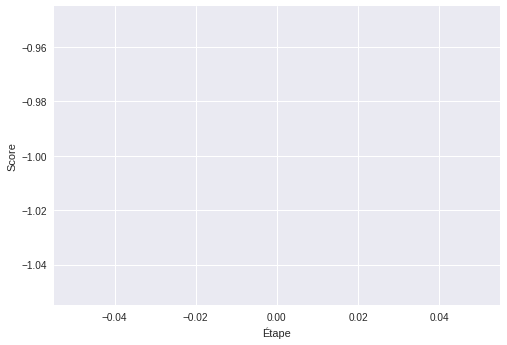

In [0]:
# main MiniMax

import matplotlib.pyplot as plt

class AgentMiniMaxTicTacToe:
    def __init__(self,player):
      self.player = player
      self.score = 0
      self.nb_action = 0
    
    def reset(self):
      self.score = 0
      self.nb_action = 0
      
    def get_score(self, game):
      '''score a game for the agent from the computers point of view, 10 - nb_actions = win, 0 = tie, -10 = lose, '''
      if game.get_winner() == self.player:
          return 10 - self.nb_action   
      elif game.get_winner() == '-':
          return 0
      else:
          return -1
    
    def get_next_state(self, game, position):
      #print(game.board)
      clone_game = GameTicTacToe()
      clone_game.board = game.board[:]
      num_of_x = clone_game.board.count('X')
      num_of_o = clone_game.board.count('O')
      player_turn = 'O'
      if num_of_x < num_of_o:
        player_turn = 'X'
      #print(position)
      clone_game.move(player_turn,position)
      #print("apres move")
      #print(clone_game.board)
      #print(f"over ? {clone_game.is_game_over()}")
      return clone_game
      
      
    def action(self, game):
      best_position = self.minimax(game)
      self.nb_action += 1
      return game.move(self.player, best_position)
      
    def get_liste_cases_libres(self,board):
      return [i for i in board if i is not None and str(i).isdigit()]

    def min_play(self,game):
      #print(game.board)
      #print(f"over ? {game.is_game_over()}")
      if game.is_game_over():
          return self.get_score(game)
      moves = self.get_liste_cases_libres(game.board)
      best_move = moves[0]
      best_score = 2 #not possible, best score is -1
      for move in moves:
          clone = self.get_next_state(game, move)
          score = self.max_play(clone)
          if score < best_score:
              best_move = move
              best_score = score
      return best_score

    def max_play(self,game):
        if game.is_game_over():
            return self.get_score(game)
        moves = self.get_liste_cases_libres(game.board)
        best_score = -2 #not possible, best score is 1
        for move in moves:
            clone = self.get_next_state(game, move)
            score = self.min_play(clone)
            if score > best_score:
                best_move = move
                best_score = score
        return best_score

    def minimax(self,game):
        moves = self.get_liste_cases_libres(game.board)
        best_move = moves[0]
        best_score = -2
        for move in moves:
            clone = self.get_next_state(game, move)
            #print(f"original : {game.board}")
            #print(f"clone : {clone.board}")
            score = self.min_play(clone)
            if score > best_score:
                best_move = move
                best_score = score
        return best_move

game = GameTicTacToe()
agent1 = AgentMiniMaxTicTacToe('X')
agent2 = AgentRandomTicTacToe('O')

num_episodes = 1
cumul_score_list = []
for i in range(num_episodes):
  score_agent1 = 0
  winner, score_agent1, score_agent2 = play(agent1, agent2)
  cumul_score_list.append(score_agent1)



print("Score success : " + str((len(cumul_score_list) - len([score_loose for score_loose in cumul_score_list if score_loose < 1])) * 100 / len(cumul_score_list) ) )  
  
plt.plot(cumul_score_list[-100:])
plt.ylabel('Score')
plt.xlabel('Étape')
plt.show()